# Lecture 9:  2D functions


## Today: 2/17


1. Numpy array shapes; python tuples.
6. Using np.meshgrid to create a domain for 2D plot.
7. Reshaping a numpy array.
8. Evaluating a 2D function by looping manually.
9. Evaluating a 2D function with vectorization.
10. Making 2D **contour** plot and 2D filled contour plot.
11. Making **wireframe** and **surface plots**.
12. Setting the range of plotted contours with the levels parameter.
13. Setting the color map.
14. Plotting a **vector field** with **quiver** and **streamlines**.

## Reading  (Hill)

* Sec. 7.5.1 (Contour Plots)
* Sec. 7.6.1 (Wireframe and Surface Plots)

Note Hill doesn't cover vector fields

## Notes

1) The domain of a 1D function is a single 1D array of x-values.
For example, [-0.5,-0.25,0.0,0.25,0.5] might be the domain of a 1D function.
The domain of a 2D function is generally  described by two 2D arrays. One of these arrays
stores a 2D array x-values, and the other stores a 2D array of y-values. A simple
example is X = [[2.0,2.5],[2.0,2.5]], Y = [[12.0,12.0],[12.1,12.1]].

2) When looping over a 2D domain to populate a function of two variables `myfunc(x,y)`,
it is easy to get confused about which index refers to `x` and which refers to `y`.
If the number of x-values is the same as the number of y-values, then you may not
have to worry about it. For example, for an 11x11 domain, you can do this:
```
def myfunc(x,y):
    return x**2 + y**2

xvals = np.linspace(-5,5,11)
yvals = np.linspace(-5,5,11)
X, Y = np.meshgrid(xvals,yvals)

zz = np.zeros((11,11))

for row in range(11):
    for col in range(11):
        zz[row,col] = myfunc(X[row,col],Y[row,col])

zz = myfunc(X, Y)     # alternative if "myfunc" is vectorizable
```
However, if your domain is not ’square’; that is, if you want the number of xvals
to be different than the number of yvals, you will need something like this:
```
Nx = 41
Ny = 21
xvals = np.linspace(-5,5,Nx)
yvals = np.linspace(-5,5,Ny)
X, Y = np.meshgrid(xvals,yvals)

zz = np.zeros(((Ny,Nx))                              # Ny before Nx!

for row in range(len(yvals)):                        # row -> len(yvals)!
    for col in range(len(xvals)):                    # col -> len(xvals)!
        zz[row,col] = myfunc(X[row,col],Y[row,col])
```
This version handles all possibilities.

3) Sec. 7.6 of the textbook says that in order to make a wireframe or surface plot,
you first have to give the statement
```
from mpl_toolkits.mplot3d import Axes3D
```
However, with the recent versions of matplotlib, including version 3.8.2+, 
it appears that you can omit this statement and the 3D plots still work.


4) 3-dimensional meshgrid notes

```
X,Y,Z = np.meshgrid(xvals, yvals, zvals)
```

this extends to arbitrarely higher order N-dimensional grids.


## Exercises

First, as always, import the essential `numpy` and `matplotlib`

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

## 2D functions  :   z = f(x,y)

Define  2D functions `f2` and `g2`.  Note that we will define `f2` with an if-statement, so it is not vectorizable.

In [7]:
def f2(x,y):  #not vectorizable
    result= x**2 + y**2
    if x>0: result = result + 10*x
    return result

def g2(x,y): #vectorizable
    result = np.sin(x) * np.cos(y)
    er2 = x**2 + 2*y**2
    result = result + np.exp(-er2)
    return result 

Create a 1D numpy array and inspect its shape. Reshape it into a 2D array.

Recall python is (by default) row-major, so `data[nrow,ncol]` and sometimes written as `data[ny,nx]`

This means in memory it stores rows after rows, i.e. `data[0,0]` is followed by `data[0,1]`. For performance there are times you would need to worry about this.

C is also row-major, like python, but FORTRAN is a column-major language.


See also https://en.wikipedia.org/wiki/Row-_and_column-major_order

In [8]:
nx = 51 #number of columns
ny = 31  #number of rows
x = np.linspace(-5,5,nx)
y = np.linspace(-5,5,ny)
z = np.zeros((ny,nx))
print(z)
print(z.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(31, 51)


Populate the function with a double for-loop.

In [9]:
for row in range(ny):
    for col in range(nx):
        z[row,col] = f2(x[col], y[row])
print(z)
# I got different values than you guys

[[ 50.          48.04        46.16       ...  92.16        96.04
  100.        ]
 [ 46.77777778  44.81777778  42.93777778 ...  88.93777778  92.81777778
   96.77777778]
 [ 43.77777778  41.81777778  39.93777778 ...  85.93777778  89.81777778
   93.77777778]
 ...
 [ 43.77777778  41.81777778  39.93777778 ...  85.93777778  89.81777778
   93.77777778]
 [ 46.77777778  44.81777778  42.93777778 ...  88.93777778  92.81777778
   96.77777778]
 [ 50.          48.04        46.16       ...  92.16        96.04
  100.        ]]


In [10]:
z = g2(x,y) #doesn't work because x & y are of different dimension

ValueError: operands could not be broadcast together with shapes (51,) (31,) 

For large arrays such double loops are not only painful to write, and are painfully slow.

Like with a 1D vectorizable function
```
      x = np.arange(100)
      y = g1(x)
```
we would like to do something like
```
       x = np.arange(100)
       y = np.arange(100)
       z = g2(x,y)
```
but this does not work!

Create the domain of the 2D function with `np.meshgrid`, now the shapes of input and output will match
and numpy knows how to vectorize

In [11]:
xm, ym = np.meshgrid(x,y)
print(xm)
print(ym)

[[-5.  -4.8 -4.6 ...  4.6  4.8  5. ]
 [-5.  -4.8 -4.6 ...  4.6  4.8  5. ]
 [-5.  -4.8 -4.6 ...  4.6  4.8  5. ]
 ...
 [-5.  -4.8 -4.6 ...  4.6  4.8  5. ]
 [-5.  -4.8 -4.6 ...  4.6  4.8  5. ]
 [-5.  -4.8 -4.6 ...  4.6  4.8  5. ]]
[[-5.         -5.         -5.         ... -5.         -5.
  -5.        ]
 [-4.66666667 -4.66666667 -4.66666667 ... -4.66666667 -4.66666667
  -4.66666667]
 [-4.33333333 -4.33333333 -4.33333333 ... -4.33333333 -4.33333333
  -4.33333333]
 ...
 [ 4.33333333  4.33333333  4.33333333 ...  4.33333333  4.33333333
   4.33333333]
 [ 4.66666667  4.66666667  4.66666667 ...  4.66666667  4.66666667
   4.66666667]
 [ 5.          5.          5.         ...  5.          5.
   5.        ]]


Lets plot this meshgrid, and you will see plt.plot() knows about multidimensional arrays as well

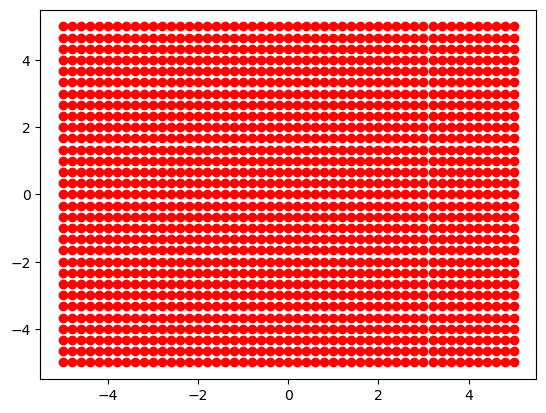

In [12]:
plt.plot(xm,ym, 'ro')

So, lets compute the function `f2` like we used `g2` before

In [13]:
z = f2(xm,ym)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

and notice it does not work....

`f2` is not a vectorizable function. so we still need to double loop manually, but now it's even more complicated if `xm` and `ym` is used

In [14]:
for row in range(ny):
    for col in range(nx):
        z[row,col] = f2(xm[row,col], ym[row,col])
print(z)

[[ 50.          48.04        46.16       ...  92.16        96.04
  100.        ]
 [ 46.77777778  44.81777778  42.93777778 ...  88.93777778  92.81777778
   96.77777778]
 [ 43.77777778  41.81777778  39.93777778 ...  85.93777778  89.81777778
   93.77777778]
 ...
 [ 43.77777778  41.81777778  39.93777778 ...  85.93777778  89.81777778
   93.77777778]
 [ 46.77777778  44.81777778  42.93777778 ...  88.93777778  92.81777778
   96.77777778]
 [ 50.          48.04        46.16       ...  92.16        96.04
  100.        ]]


There are two solutions to this problem again, which we saw before using 1D functions:

1. Use `np.vectorize`
2. If the function allows it, use `np.where`

In [15]:
vf2 = np.vectorize(f2)
z2 = vf2(xm,ym)
print(z2)
print(z)

[[ 50.          48.04        46.16       ...  92.16        96.04
  100.        ]
 [ 46.77777778  44.81777778  42.93777778 ...  88.93777778  92.81777778
   96.77777778]
 [ 43.77777778  41.81777778  39.93777778 ...  85.93777778  89.81777778
   93.77777778]
 ...
 [ 43.77777778  41.81777778  39.93777778 ...  85.93777778  89.81777778
   93.77777778]
 [ 46.77777778  44.81777778  42.93777778 ...  88.93777778  92.81777778
   96.77777778]
 [ 50.          48.04        46.16       ...  92.16        96.04
  100.        ]]
[[ 50.          48.04        46.16       ...  92.16        96.04
  100.        ]
 [ 46.77777778  44.81777778  42.93777778 ...  88.93777778  92.81777778
   96.77777778]
 [ 43.77777778  41.81777778  39.93777778 ...  85.93777778  89.81777778
   93.77777778]
 ...
 [ 43.77777778  41.81777778  39.93777778 ...  85.93777778  89.81777778
   93.77777778]
 [ 46.77777778  44.81777778  42.93777778 ...  88.93777778  92.81777778
   96.77777778]
 [ 50.          48.04        46.16       ...  92.1

Plot the function with a contour plot and a filled contour plot.

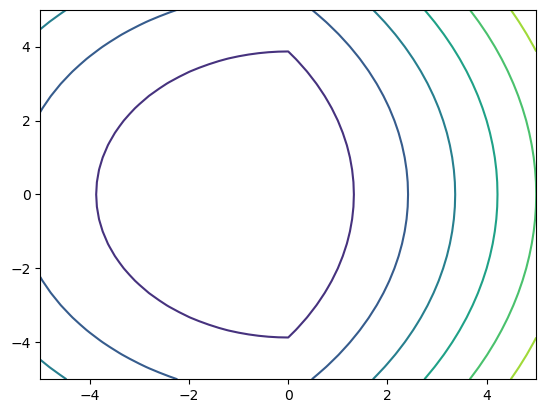

In [16]:
fig, ax = plt.subplots()
ax.contour(x,y,z)

A filled contour plot will fill colors, instead of using contours.

Use import matplotlib.cm as cm and try out some color maps, such as cm.viridis,cm.hot, cm.winter, and cm.jet using the cm= keyword

Text(0.5, 1.0, 'contour + filled contour')

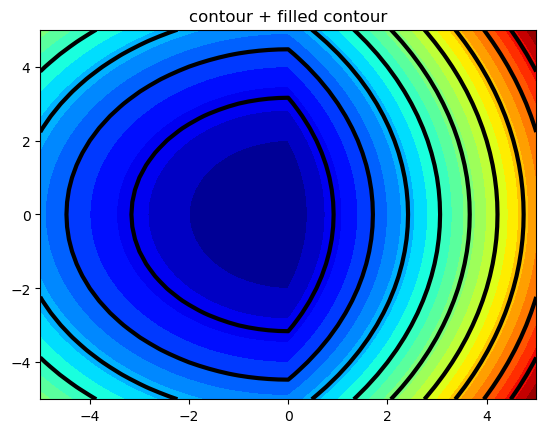

In [17]:
fig, ax =  plt.subplots()
# ax.contourf(x,y,z)

# ax.contourf(x,y,z, 30)
import matplotlib.cm as cm
ax.contourf(x,y,z, 30, cmap=cm.jet)
ax.contour(x,y,z, levels=10, colors=['black'], linewidths=3)
ax.set_title("contour + filled contour")

Set the `levels` parameter of a contour plot.

In [18]:
import matplotlib.cm as cm

Create an axes with a 3d projection using `projection='3d'`; add a wireframe and surface plot.

Use `import matplotlib.cm as cm` and try out some color maps, such as `cm.viridis`,`cm.hot`,
`cm.winter`, and `cm.jet` using the `cm=` keyword


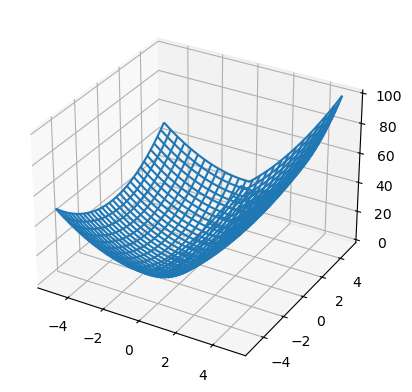

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_wireframe(xm,ym,z)
# ax.plot_wireframe(xm,ym,z, rstride=4, cstride=3)
# surf = ax.plot_surface(xm,ym,z, cmap = cm.jet, rstride=4, cstride=3)
# fig.colorbar(surf)
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")
#plt.tight_layout()

##  Vectorfield:   VX,VY = f2(X,Y)

For a vectorfield, at each position (X,Y) we have a vector (VX,VY). This could be a velocity, or a magnetic field vector, or an acceleration vector etc.

Two common way to view such a vector field are:

1. quiver: draw little vectors at selected positions
2. streamplot: draw flowlines connecting vectors , like a contour plot

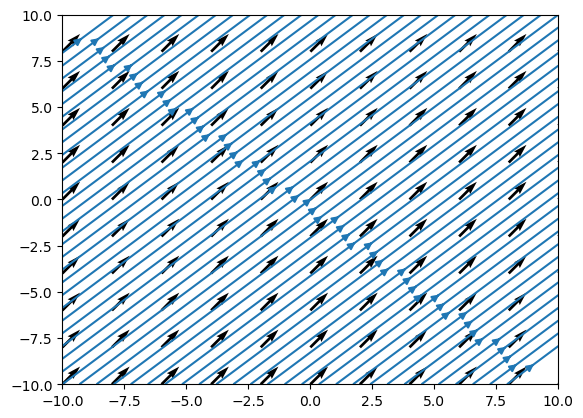

In [20]:
fig, ax = plt.subplots()

xvals = np.linspace(-10, 10, 11)
yvals = np.linspace(-10, 10, 11)
X,Y = np.meshgrid(xvals, yvals)

VX = np.ones((11,11))
VY = np.ones((11,11))

ax.quiver(X,Y, VX, VY)
ax.streamplot(X,Y,VX,VY)
ax.set_aspect = 1.0 #ax.set_aspect(1)

play with the (VX,VY) vectors to make a more interesting view

another variation on this theme:

## Advanced

There's a 3D test data set in mplot3d